# E-commerce datasets

### Commerce data analysis
datasets: https://www.kaggle.com/datasets/carrie1/ecommerce-data?select=data.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
pd.options.display.float_format = '{:5f}'.format

try:
    from pandasql import sqldf
    from apyori import apriori
except:
    !pip install pandasql
    from pandasql import sqldf
    !pip install apyori
    from apyori import apriori

import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=5dbfb7d51ecab261c6775ec6f29498e5be06fdc3f45f6c641ba8d6f70d9dbaf8
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=ec07f74b8579374ad18b53d7ddb246810efd89d3dbe01247aaad8e663993adf0
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML_Algorithm/datasets/ecommerce_data.csv', encoding='latin1')
print(df.shape)

df.head(20)

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.550000,17850.000000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.390000,17850.000000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.750000,17850.000000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.390000,17850.000000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.390000,17850.000000,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.650000,17850.000000,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.250000,17850.000000,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.850000,17850.000000,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.850000,17850.000000,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.690000,13047.000000,United Kingdom


In [4]:
######################
### SQL query ZONE ###
######################

# InvoiceNo 중 한번에 제일 많이 purchase 한 횟수는 약 1170.
# StockCode는 물품 Category라고 보아도 무방.
# 구매 중, 제일 많이 구매된 StockCode Category는 10002이며, Description은 INFLATABLE POLITICAL GLOBE
# CustomerID가 없는 데이터의 처리
# 가장 대중적인(최소한 한 번 이상 구매한 StockCode) 10002는 73명의 사람들이 구매했었음. 그 외, 10080 상품은 24명이 구매했었음.
# 14911 customer은 C2 상품을 기간 내 85번 구매함

query = """
select StockCode
     , count(distinct CustomerID) u_customer_cnt
from df
group by 1
order by 2 desc
;
"""

sqldf(query)

,StockCode,u_customer_cnt
0,22423,887
1,85123A,858
2,47566,708
3,84879,679
4,22720,640
...,...,...
4065,gift_0001_20,0
4066,gift_0001_30,0
4067,gift_0001_40,0
4068,gift_0001_50,0


Null Counts:  InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


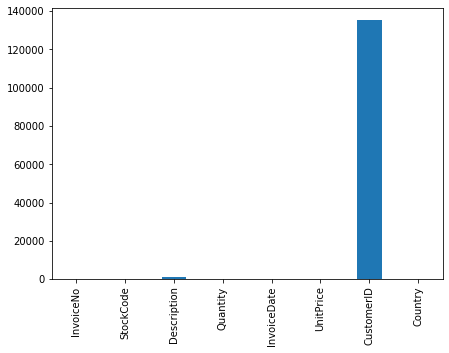

In [5]:
# Null data

print("Null Counts: ", f"{df.isnull().sum()}")
df.isnull().sum().plot(figsize=(7,5), kind='bar')

In [6]:
# Convert to datetime

df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate)

df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550000,17850.000000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390000,17850.000000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750000,17850.000000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390000,17850.000000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390000,17850.000000,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.650000,17850.000000,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.250000,17850.000000,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.850000,17850.000000,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.850000,17850.000000,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.690000,13047.000000,United Kingdom


In [7]:
# Timstamp per purchase Tracking

query = """
select InvoiceDate
     , count(StockCode) per_cnt
from df
group by 1
order by 2 desc
;
"""

timestamp_purchase_cnt = sqldf(query)
timestamp_purchase_cnt

,InvoiceDate,per_cnt
0,2011-10-31 14:41:00.000000,1114
1,2011-12-08 09:28:00.000000,749
2,2011-12-09 10:03:00.000000,731
3,2011-12-05 17:24:00.000000,721
4,2011-06-29 15:58:00.000000,705
...,...,...
23255,2011-12-09 09:44:00.000000,1
23256,2011-12-09 10:02:00.000000,1
23257,2011-12-09 10:28:00.000000,1
23258,2011-12-09 11:50:00.000000,1


In [8]:
# day per purchase Tracking

query = """
select date(InvoiceDate) Invoice_date
     , count(StockCode) per_cnt
from df
group by 1
order by 1
;
"""

day_purchase_cnt = sqldf(query)
day_purchase_cnt

,Invoice_date,per_cnt
0,2010-12-01,3108
1,2010-12-02,2109
2,2010-12-03,2202
3,2010-12-05,2725
4,2010-12-06,3878
...,...,...
300,2011-12-05,5331
301,2011-12-06,3365
302,2011-12-07,2438
303,2011-12-08,4940


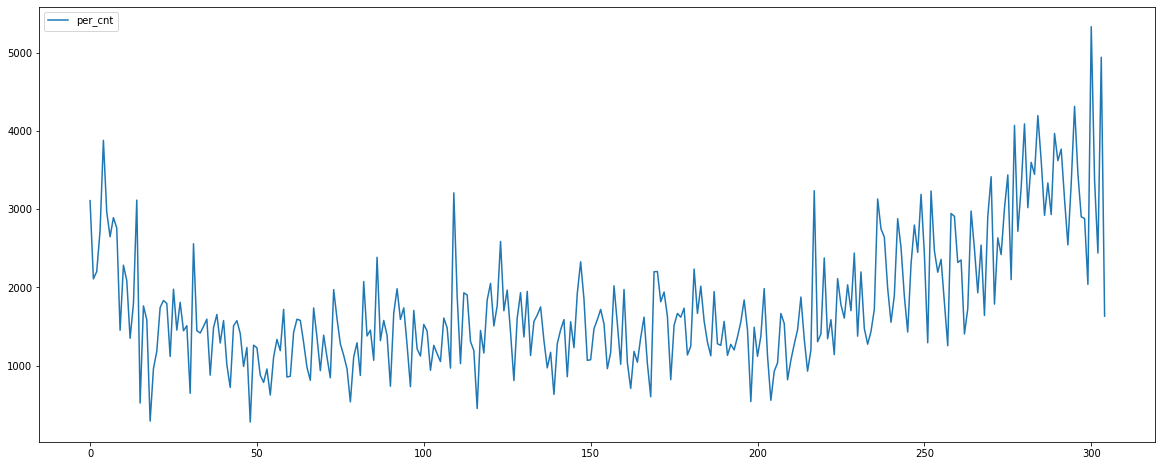

In [9]:
day_purchase_cnt.plot(figsize=(20,8))

In [10]:
query = """
select InvoiceNo
     , StockCode
     , Description
     , Quantity
     , InvoiceDate
     , UnitPrice
     , cast(CustomerID as int) as CustomerID
     , Country
from df
where UnitPrice != 0
and Quantity != 0
and CustomerID is not null
;
"""

df = sqldf(query)
print(df.shape)

df.head(10)

(406789, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00.000000,2.550000,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00.000000,3.390000,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00.000000,2.750000,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00.000000,3.390000,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00.000000,3.390000,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00.000000,7.650000,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00.000000,4.250000,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00.000000,1.850000,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00.000000,1.850000,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00.000000,1.690000,13047,United Kingdom


In [11]:
print("Null / Nan values")
df.isnull().sum()

Null / Nan values


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Apriori algorithm

In [15]:
query = """
select pur_list
from
(
    select InvoiceDate
        , InvoiceNo
        , group_concat(Description) pur_list
    from df
    where UnitPrice > 0
    and Description is not null
    group by 1,2
)
;
"""

df_apriori = sqldf(query)
df_apriori

,pur_list
0,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."
1,"HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT"
2,"ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUS..."
3,"JAM MAKING SET WITH JARS,RED COAT RACK PARIS F..."
4,BATH BUILDING BLOCK WORD
...,...
22212,"LUNCH BAG RED RETROSPOT,6 CHOCOLATE LOVE HEART..."
22213,"RED FLOCK LOVE HEART PHOTO FRAME,6 CHOCOLATE L..."
22214,"BLACK TEA TOWEL CLASSIC DESIGN,ASSORTED BOTTLE..."
22215,"LARGE CAKE STAND HANGING STRAWBERY,SET OF 3 H..."


In [16]:
purchase_list = [i.split(',') for i in df_apriori['pur_list']]

apriori_list = []

for i in purchase_list:
    apriori_list.append(i)

apriori_list[:5]

[['WHITE HANGING HEART T-LIGHT HOLDER',
  'WHITE METAL LANTERN',
  'CREAM CUPID HEARTS COAT HANGER',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'RED WOOLLY HOTTIE WHITE HEART.',
  'SET 7 BABUSHKA NESTING BOXES',
  'GLASS STAR FROSTED T-LIGHT HOLDER'],
 ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'],
 ['ASSORTED COLOUR BIRD ORNAMENT',
  "POPPY'S PLAYHOUSE BEDROOM ",
  "POPPY'S PLAYHOUSE KITCHEN",
  'FELTCRAFT PRINCESS CHARLOTTE DOLL',
  'IVORY KNITTED MUG COSY ',
  'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'BOX OF VINTAGE JIGSAW BLOCKS ',
  'BOX OF VINTAGE ALPHABET BLOCKS',
  'HOME BUILDING BLOCK WORD',
  'LOVE BUILDING BLOCK WORD',
  'RECIPE BOX WITH METAL HEART',
  'DOORMAT NEW ENGLAND'],
 ['JAM MAKING SET WITH JARS',
  'RED COAT RACK PARIS FASHION',
  'YELLOW COAT RACK PARIS FASHION',
  'BLUE COAT RACK PARIS FASHION'],
 ['BATH BUILDING BLOCK WORD']]

In [20]:
results = list(apriori(transactions=apriori_list
                       , min_support=0.003
                       , min_confidence=0.3
                       , min_lift=3
                       , min_length=2
                       , max_length=3))
results[:5]

[RelationRecord(items=frozenset({' BIRTHDAY CARD', ' '}), support=0.005716343340685061, ordered_statistics=[OrderedStatistic(items_base=frozenset({' '}), items_add=frozenset({' BIRTHDAY CARD'}), confidence=0.32480818414322254, lift=56.82097186700768), OrderedStatistic(items_base=frozenset({' BIRTHDAY CARD'}), items_add=frozenset({' '}), confidence=1.0, lift=56.82097186700767)]),
 RelationRecord(items=frozenset({' ', 'CARD BILLBOARD FONT'}), support=0.004996174100913715, ordered_statistics=[OrderedStatistic(items_base=frozenset({'CARD BILLBOARD FONT'}), items_add=frozenset({' '}), confidence=0.3323353293413174, lift=18.883616398915724)]),
 RelationRecord(items=frozenset({' ', 'COWBOYS AND INDIANS BIRTHDAY CARD '}), support=0.003555835621371022, ordered_statistics=[OrderedStatistic(items_base=frozenset({'COWBOYS AND INDIANS BIRTHDAY CARD '}), items_add=frozenset({' '}), confidence=0.38916256157635465, lift=22.11259496302269)]),
 RelationRecord(items=frozenset({'ELEPHANT', ' '}), support=

In [19]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    
    return list(zip(lhs, rhs, supports, confidences, lifts))

In [21]:
resultsDataFrame = pd.DataFrame(inspect(results), columns=['left_hand_side', 'right_hand_side', 'support', 'confidence', 'lift'])
resultsDataFrame

,left_hand_side,right_hand_side,support,confidence,lift
0,,BIRTHDAY CARD,0.005716,0.324808,56.820972
1,CARD BILLBOARD FONT,,0.004996,0.332335,18.883616
2,COWBOYS AND INDIANS BIRTHDAY CARD,,0.003556,0.389163,22.112595
3,,ELEPHANT,0.005716,0.324808,56.820972
4,,FANCY FONT BIRTHDAY CARD,0.011298,0.641944,56.820972
...,...,...,...,...,...
3237,WOOD S/3 CABINET ANT WHITE FINISH,WOODEN PICTURE FRAME WHITE FINISH,0.003826,0.497076,12.352951
3238,WOODEN FRAME ANTIQUE WHITE,WOODEN PICTURE FRAME WHITE FINISH,0.006752,0.781250,19.415024
3239,WOODEN FRAME ANTIQUE WHITE,WOODEN PICTURE FRAME WHITE FINISH,0.003826,0.648855,16.124844
3240,WOOD S/3 CABINET ANT WHITE FINISH,WOODEN PICTURE FRAME WHITE FINISH,0.003916,0.731092,18.168547


In [25]:
query = """
select *
from resultsDataFrame
where left_hand_side not in (' ','B')
and right_hand_side != ' '
order by confidence desc, lift desc
;
"""

sqldf(query)

,left_hand_side,right_hand_side,support,confidence,lift
0,C PAINTED LETTERS,NURSERY A,0.003016,1.000000,331.597015
1,BREAKFAST IN BED,TRAY,0.003241,1.000000,308.569444
2,RETRO SPOT,BIRTHDAY CARD,0.005671,1.000000,176.325397
3,BIRTHDAY CARD,ELEPHANT,0.005716,1.000000,174.937008
4,AIRLINE LOUNGE,METAL SIGN,0.006707,1.000000,105.795238
...,...,...,...,...,...
3226,CHRISTMAS CRAFT WHITE FAIRY,FELTCRAFT CHRISTMAS FAIRY,0.004366,0.300310,21.803851
3227,CHARLOTTE BAG APPLES DESIGN,LUNCH BAG RED RETROSPOT,0.005851,0.300231,5.018985
3228,ICE CREAM SUNDAE LIP GLOSS,DOUGHNUT LIP GLOSS,0.003376,0.300000,21.431190
3229,COOK WITH WINE METAL SIGN,YOU'RE CONFUSING ME METAL SIGN,0.003646,0.300000,19.207781


### Other Data(Udemy studing data)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Udemy/MachineLearning/ML/Part 5 - Association Rule Learning/Section 28 - Apriori/Python/Market_Basket_Optimisation.csv', header=None)
print(df2.shape)

df2.head(10)

(7501, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2.values[0]

array(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil'], dtype=object)

In [ ]:
transactions = []

for i in range(len(df2)):
    transactions.append([str(df2.values[i,j]) for j in range(0,20)])

transactions[:5]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

In [ ]:
transaction_list[0][0]

'WHITE HANGING HEART T-LIGHT HOLDER'

In [ ]:
results = list(apriori(transactions=transactions
                       , min_support=0.003
                       , min_confidence=0.3
                       , min_lift=3
                       , min_length=2
                       , max_length=3))
results

[RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)]),
 RelationRecord(items=frozenset({'ground beef', 'tomato sauce'}), support=0.005332622317024397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tomato sauce'}), items_add=frozenset({'groun

In [ ]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    
    return list(zip(lhs, rhs, supports, confidences, lifts))

In [ ]:
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
resultsinDataFrame.sort_values(by='Confidence', ascending=False)

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
7,ground beef,spaghetti,0.003066,0.676471,3.885303
40,tomatoes,spaghetti,0.004399,0.611111,3.509912
33,ground beef,spaghetti,0.003066,0.575000,3.302508
12,ground beef,spaghetti,0.004799,0.571429,3.281995
14,eggs,spaghetti,0.003733,0.528302,3.034297
32,ground beef,spaghetti,0.005999,0.523256,3.005315
9,olive oil,milk,0.003600,0.500000,3.858539
20,frozen vegetables,milk,0.003999,0.500000,3.858539
17,herb & pepper,ground beef,0.003200,0.461538,4.697422
37,spaghetti,milk,0.003999,0.454545,3.507763


In [ ]:
query = """
select Left_Hand_Side
     , Right_Hand_Side
     , avg(Confidence) avg_confidence
     , avg(Lift) avg_lift
from resultsinDataFrame
group by 1,2
order by 3 desc, 4 desc
;
"""

sqldf(query)

,Left_Hand_Side,Right_Hand_Side,avg_confidence,avg_lift
0,tomatoes,spaghetti,0.611111,3.509912
1,ground beef,spaghetti,0.586539,3.368780
2,eggs,spaghetti,0.528302,3.034297
3,frozen vegetables,milk,0.461765,3.563474
4,tomatoes,milk,0.442308,3.413323
5,spaghetti,milk,0.435606,3.361606
6,olive oil,milk,0.432143,3.334878
7,ground beef,milk,0.409705,3.161724
8,herb & pepper,ground beef,0.408722,4.159866
9,mineral water,olive oil,0.402778,6.115863
